# Arranging data

Here we will demonstrate how to cut a desired region from a large data source, how to load new data to the database, and how to get saved data.

## Cutting the desired region

Two sources for the topography tool's data are currently available in hera-data. They may be added to the current project using the next commands:

hera-data-load documentation Topography BNTL

hera-data-load documentation Topography SRTM

Here, "documentation" is the project name, "Topography" is the type of the data and "BNTL"/"SRTM" is the source.

Both sources hold data of whole Israel, which is too large to handle.
Therefore, one usually has to cut a desired region from the source.
This is done using the next procedure:

In [2]:
# from hera import toolkitHome
# projectName = "documentation"
# toolkitName = "GIS_Topography"
# Topography = toolkitHome.getToolkit(projectName=projectName,toolkitName=toolkitName)

In [2]:
from hera.measurements.GIS.locations.topography import TopographyToolkit
import geopandas
projectName = "documentation"
FilesDirectory = "New-Files-Directory"
Topography  = TopographyToolkit(projectName=projectName,FilesDirectory=FilesDirectory)
points = [263000,765000,266000,768000]
regionName = "Katsrin"
# KatsrinDocBNTL = Topography.makeRegion(points=points, regionName=regionName, saveMode=None, dataSourceOrFile="BNTL", dataSourceVersion="1")
# KatsrinDocSRTM = Topography.makeRegion(points=points, regionName=regionName, saveMode=None, dataSourceOrFile="SRTM", dataSourceVersion="1")

The "makeRegion" function returns the name of the file of the new region if the saveMode doesn't include adding to the database.
If the new file is added to the database, the function returns its document.

The "BNTL" data is loaded as a geodataframe of shapely linestrings representing contour lines. 

We will load examples files directely from the examples directory in order to demostrate the two kinds of data.

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,12,230,119163.430745,119163.430745,"MULTILINESTRING ((263609.072 765000.000, 26360..."
1,611,11,235,78.020414,78.020414,"MULTILINESTRING ((263014.006 765006.006, 26301..."
2,611,11,235,49.780628,49.780628,"MULTILINESTRING ((263010.475 765092.000, 26300..."
3,611,11,235,119354.375478,119354.375478,"MULTILINESTRING ((263672.879 765000.000, 26367..."
4,611,13,240,84246.297587,84246.297587,"MULTILINESTRING ((264313.610 765000.000, 26431..."
5,611,11,245,24.245031,24.245031,"LINESTRING (263098.178 765592.000, 263096.902 ..."
6,611,11,245,48.580856,48.580856,"LINESTRING (263272.076 765548.000, 263268.581 ..."
7,611,11,245,84147.781363,84147.781363,"MULTILINESTRING ((264362.848 765000.000, 26436..."
8,611,18,250,342.540894,342.540894,"LINESTRING (263749.716 765456.000, 263748.933 ..."
9,611,18,250,53679.737512,53679.737512,"MULTILINESTRING ((264465.965 765000.000, 26446..."


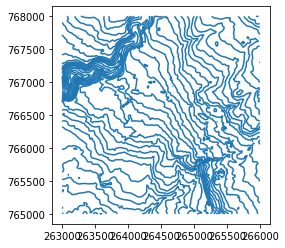

In [4]:
katsrinBNTL = geopandas.read_file("examples/Katsrin/CONTOUR.shp")
katsrinBNTL.plot()
katsrinBNTL[:10]

## Loading new data

New data may be loaded to the database.
The loading function recieves either the name of the file or the data itself as a geodataframe as the input data.
For example:

In [5]:
fileName = "Saved-File-Directory"
saveMode = "SaveMode"
descriptors = {} # any descriptors of the data
# buildings.loadData(fileNameOrData = fileName, saveMode=saveMode, regionName=regionName, additionalData=descriptors)

## Getting stored data

Stored data may be loaded using the standard datalayer function:

In [6]:
StoredData = buildings.getMeasurementsDocuments(**descriptors)